In [63]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Conectamos con la base de datos:

In [64]:
# Create your connection.
conn = sqlite3.connect('sales.db')
df = pd.read_sql_query("SELECT * FROM sales", conn)

### Transformamos las a fecha a datetime type.

In [65]:
df['record_time'] = pd.to_datetime(df['record_time'], format = '%Y-%m-%d')

### Formateamos los nombres a lowercase

In [66]:
df['name'] = df['name'].str.lower()
df['brand'] = df['brand'].str.lower().str.replace(' ', '')

### Eliminamos las ventas en 0

In [67]:
df = df[df['quantity'] != 0]

In [68]:
df.head()

,name,articulo,talle,color,brand,quantity,price,barcode,status,record_time
0,cola less alg&lycra liso enviv.,5604.0,3.0,negro,cocot,1,504.242469,7793617998718,VENDIDA,2021-06-25
2,ribb manga corta con aplique,903.0,2.0,hueso,piachepiu,1,959.725800,9604005,VENDIDA,2021-06-25
3,corpiño armado micromasaje 2da piel,5932.0,90.0,avellana,cocot,1,1745.409945,7793617101910,VENDIDA,2021-06-25
4,tanga colaless jackard,6386.0,unico,blanco,cocot,1,452.511750,7793617115177,VENDIDA,2021-06-25
5,"soutiens sin aro con cintura, realizado en mic...",295.0,110.0,NEGRO,deville,1,2574.052312,295004110,VENDIDA,2021-06-25


# EDA

## Productos:

### Diez productos mas vendidos

In [69]:
most_sold = df.copy()
most_sold = most_sold.reindex(most_sold.index.repeat(most_sold.quantity)).reset_index(drop = True)
most_sold = most_sold[most_sold['status'] == 'VENDIDA']
most_sold_count = most_sold['name'].value_counts().to_frame().reset_index()[:10]
most_sold_count.rename(columns = {'index':'Nombre', 'name':'Cantidad'}, inplace = True)

fig = px.bar(most_sold_count, x='Nombre', y='Cantidad')
fig.show()

### De los productos mas vendidos, veamos que colores y que talles tienen:

### Talles:

In [70]:
only_top_3 = most_sold.copy()
names = most_sold_count['Nombre'].to_list()[:3]
same_size = only_top_3[only_top_3['name'].isin(names)]
only_top_3


talles = same_size.groupby(['name', 'talle']).size()
talles = talles.to_frame().reset_index()
talles.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(talles, x="Nombre", y="Cantidad", color="talle")
fig.update_layout(barmode='group', title_text = "Talles mas vendidos", title_x = 0.5)
fig.show()

In [71]:
only_top_3 = most_sold.copy()
names = most_sold_count['Nombre'].to_list()[:3]
colors_equal = only_top_3[only_top_3['name'].isin(names)]
colors_equal

colores = colors_equal.groupby(['name', 'color']).size()
colores = colores.to_frame().reset_index()
colores.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(colores, x="Nombre", y="Cantidad", color="color")
fig.update_layout(barmode='group', title_text = "Colores mas vendidos", title_x = 0.5)
fig.show()

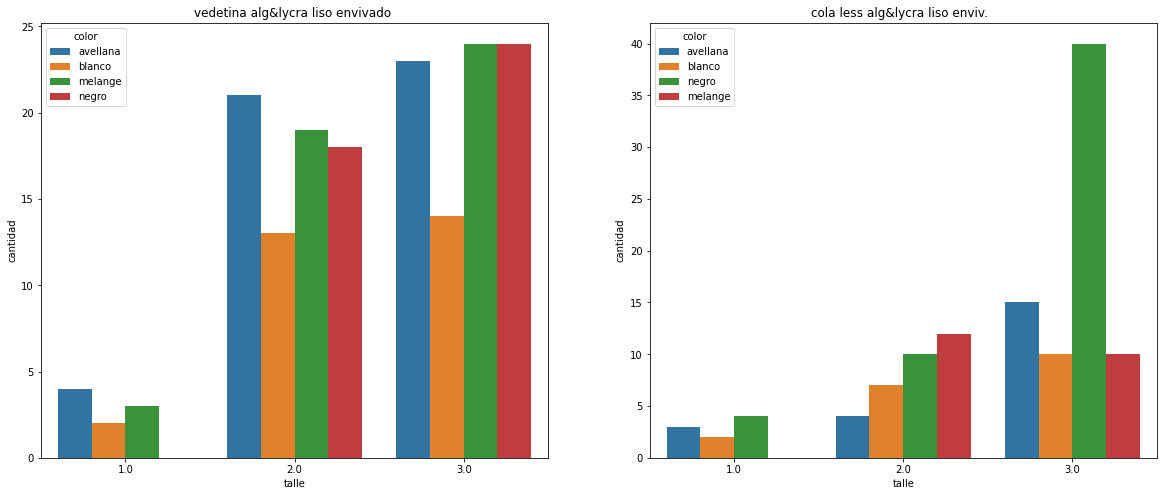

In [72]:

only_top_3 = most_sold.copy()
axes_count = 0
fig, axes = plt.subplots(1,2, sharex=True, figsize=(20,8))
names = most_sold_count['Nombre'].to_list()[:2]
for name in names:
#    print(name)
    colors_equal = only_top_3[only_top_3['name'] == name]
    colores = colors_equal.groupby(['talle', 'color']).size()
    colores = colores.to_frame().reset_index()
    colores.rename(columns = {0:"cantidad"}, inplace = True)
#    print(colores)
    sns.barplot(ax = axes[axes_count], x = colores.talle, y = colores.cantidad, hue = colores.color)
    axes[axes_count].set_title(names[axes_count])
    axes_count += 1

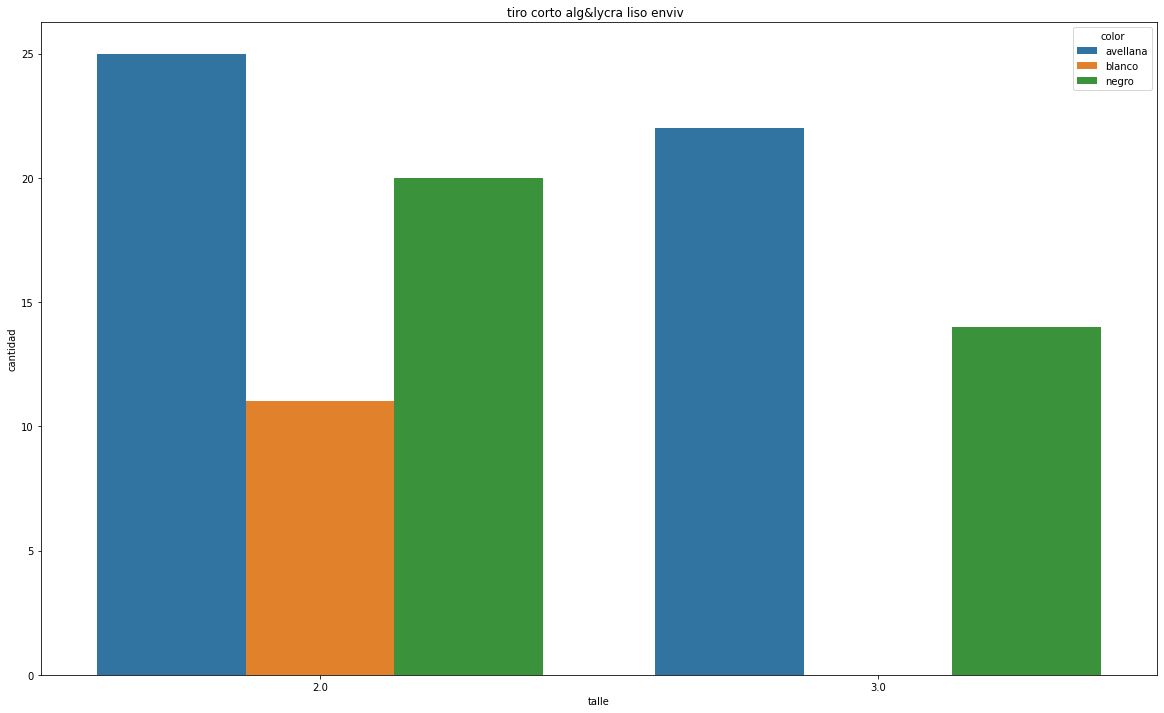

In [73]:
plt.figure(figsize=(20,12))
names = most_sold_count['Nombre'].to_list()[2:3]
colors_equal = only_top_3[only_top_3['name'] == names[0]]
colores = colors_equal.groupby(['talle', 'color']).size()
colores = colores.to_frame().reset_index()
colores.rename(columns = {0:"cantidad"}, inplace = True)
sns.barplot(data = colores, x = "talle", y = "cantidad", hue = "color").set_title(names[0])
plt.show()

### Misma categoria, pero distintos talles:

In [74]:
names2 = []
names2.append(most_sold_count['Nombre'].to_list()[7])
names2.append(most_sold_count['Nombre'].to_list()[9])
#names2.append(most_sold_count['Nombre'].to_list()[4])
different_size = only_top_3[only_top_3['name'].isin(names2)]
talles = different_size.groupby(['name', 'talle']).size()
talles = talles.to_frame().reset_index()
talles.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(talles, x="Nombre", y="Cantidad", color="talle")
fig.update_layout(barmode='group', title_text = "Talles mas vendidos", title_x = 0.5)
fig.show()

In [75]:
# COLORES GENERALES


color_diff = only_top_3[only_top_3['name'].isin(names2)]
color_diff = color_diff.groupby(['name', 'color']).size()
color_diff = color_diff.to_frame().reset_index()
color_diff.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(color_diff, x="Nombre", y="Cantidad", color="color")
fig.update_layout(barmode='group',title_text = "Colores mas vendidos", title_x = 0.5)
fig.show()

In [76]:
# COLORES POR TALLE:

color_by_size = only_top_3[only_top_3['name'].isin(names2)]
color_by_size = color_by_size.groupby(['talle', 'color']).size()
color_by_size = color_by_size.to_frame().reset_index()
color_by_size.rename(columns = {0:"Cantidad"}, inplace = True)
fig = px.bar(color_by_size, x="talle", y="Cantidad", color="color")
fig.update_layout(barmode='group', title_text = "Colores mas vendidos por talle", title_x = 0.5)
fig.show()

In [77]:
## TALLE Y COLORES DE CADA UNO
for i in range(2):
    colors_talle = only_top_3[only_top_3['name'] == names2[i]]
    colors_ca = colors_talle.groupby(['talle', 'color']).size()
    colors_ca = colors_ca.to_frame().reset_index()
    colors_ca.rename(columns = {0:"Cantidad"}, inplace = True)
    fig = px.bar(colors_ca, x="talle", y="Cantidad", color="color")
    fig.update_layout(barmode='group', title_text = names2[i], title_x = 0.5)
    fig.show()

In [78]:
names3 = []
names3.append(most_sold_count['Nombre'].to_list()[4])
different_size = only_top_3[only_top_3['name'].isin(names3)]
talles = different_size.groupby(['name', 'talle']).size()
talles = talles.to_frame().reset_index()
talles.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(talles, x="Nombre", y="Cantidad", color="talle")
fig.update_layout(barmode='group', title_text = "Talles mas vendidos", title_x = 0.5)
fig.show()

color_diff = only_top_3[only_top_3['name'].isin(names3)]
color_diff = color_diff.groupby(['name', 'color']).size()
color_diff = color_diff.to_frame().reset_index()
color_diff.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(color_diff, x="Nombre", y="Cantidad", color="color")
fig.update_layout(barmode='group', title_text = "Colores mas vendidos", title_x = 0.5)
fig.show()

colors_talle = only_top_3[only_top_3['name'] == names3[0]]
colors_ca = colors_talle.groupby(['talle', 'color']).size()
colors_ca = colors_ca.to_frame().reset_index()
colors_ca.rename(columns = {0:"Cantidad"}, inplace = True)
fig = px.bar(colors_ca, x="talle", y="Cantidad", color="color")
fig.update_layout(barmode='group', title_text = names3[0], title_x = 0.5)
fig.show()

### Corpinios:

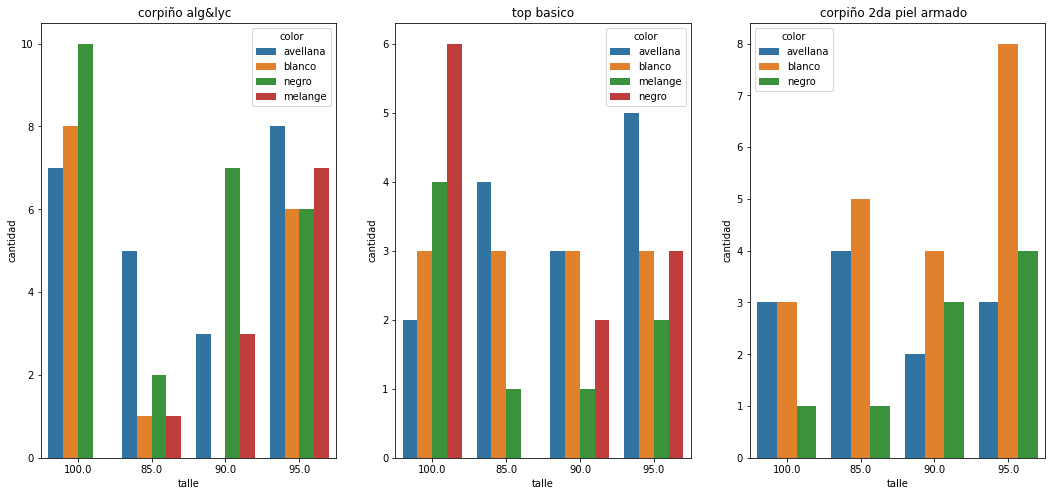

In [79]:
corp = only_top_3.copy()
names_corp = []
names_corp.append(most_sold_count['Nombre'].to_list()[3])
names_corp.append(most_sold_count['Nombre'].to_list()[5])
names_corp.append(most_sold_count['Nombre'].to_list()[6])
names_corp.append(most_sold_count['Nombre'].to_list()[8])
corp_size = only_top_3[only_top_3['name'].isin(names_corp)]
talles_corp = corp_size.groupby(['name', 'talle']).size()
talles_corp = talles_corp.to_frame().reset_index()
talles_corp.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(talles_corp, x="Nombre", y="Cantidad", color="talle")
fig.update_layout(barmode='group', title_text = "Talles mas vendidos", title_x = 0.5)
fig.show()


corp_size = only_top_3[only_top_3['name'].isin(names_corp)]
talles_corp = corp_size.groupby(['name', 'color']).size()
talles_corp = talles_corp.to_frame().reset_index()
talles_corp.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(talles_corp, x="Nombre", y="Cantidad", color="color")
fig.update_layout(barmode='group', title_text = "Colores mas vendidos", title_x = 0.5)
fig.show()



axes_count = 0
fig, axes = plt.subplots(1,3, sharex=True, figsize=(18,8))
new_name = names_corp.pop(3)
for name in names_corp:
    colors_talle = only_top_3[only_top_3['name'] == name]
    colors_corp = colors_talle.groupby(['talle', 'color']).size()
    colors_corp = colors_corp.to_frame().reset_index()
    colors_corp.rename(columns = {0:"cantidad"}, inplace = True)
    sns.barplot(ax = axes[axes_count], x = colors_corp.talle, y = colors_corp.cantidad, hue = colors_corp.color)
##    print(axes_count)
    axes[axes_count].set_title(names_corp[axes_count])
    axes_count += 1

In [80]:
print(new_name)
colors_talle = only_top_3[only_top_3['name'] == new_name]
colors_corp = colors_talle.groupby(['talle', 'color']).size()
colors_corp = colors_corp.to_frame().reset_index()
colors_corp.rename(columns = {0:"cantidad"}, inplace = True)
fig = px.bar(colors_corp, x="talle", y="cantidad", color="color")
fig.update_layout(barmode='group', title_text = "Colores por talle mas vendidos de "+new_name, title_x = 0.5)
fig.show()

corp dama armado 2da piel


## Marcas:

### Marcas mas vendidas:

In [81]:
brand_most_sold = most_sold.copy()
brand_most_sold_count = most_sold['brand'].value_counts().to_frame().reset_index()
brand_most_sold_count.rename(columns = {'index':'Nombre', 'brand':'Cantidad'}, inplace = True)
fig = px.bar(brand_most_sold_count, x='Nombre', y='Cantidad')
fig.show()

In [82]:
brand_most_sold

,name,articulo,talle,color,brand,quantity,price,barcode,status,record_time
0,cola less alg&lycra liso enviv.,5604.0,3.0,negro,cocot,1,504.242469,7793617998718,VENDIDA,2021-06-25
1,ribb manga corta con aplique,903.0,2.0,hueso,piachepiu,1,959.725800,9604005,VENDIDA,2021-06-25
2,corpiño armado micromasaje 2da piel,5932.0,90.0,avellana,cocot,1,1745.409945,7793617101910,VENDIDA,2021-06-25
3,tanga colaless jackard,6386.0,unico,blanco,cocot,1,452.511750,7793617115177,VENDIDA,2021-06-25
4,"soutiens sin aro con cintura, realizado en mic...",295.0,110.0,NEGRO,deville,1,2574.052312,295004110,VENDIDA,2021-06-25
...,...,...,...,...,...,...,...,...,...,...
2975,conjunto triángulo con tanga colaless leopardo,6059.0,95.0,negro,cocot,1,1745.409945,7793617272856,VENDIDA,2021-11-25
2976,tanga colaless puntilla contratono,6083.1,3.4,MINT,cocot,1,775.738400,7793617286853,VENDIDA,2021-11-25
2977,triangulo puntilla contratono,6076,100,mint,cocot,1,1552.000000,7793617286495,VENDIDA,2021-11-25
2978,vedetina algodón,1000.0,12.0,blanco,mumi,1,542.336048,10000112,VENDIDA,2021-11-25


In [129]:
cocot = brand_most_sold[brand_most_sold['brand'] == 'cocot']
most_sold = cocot.value_counts('name').to_frame().reset_index()[:20]
most_sold.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(most_sold, x='Nombre', y='Cantidad')
fig.update_layout(title_text = " Mas vendido Cocot" , title_x = 0.5)
fig.show()



less_sold = cocot.value_counts('name').to_frame().reset_index()[40:]
less_sold.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(less_sold, x='Nombre', y='Cantidad')
fig.update_layout(title_text = "Menos Vendido Cocot" , title_x = 0.5)
fig.update_layout(
    autosize=False,
    width=1600,
    height=500,)
fig.show()

devielle = brand_most_sold[brand_most_sold['brand'] == 'deville']
a = devielle.value_counts('name').to_frame().reset_index()
a.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(a, x='Nombre', y='Cantidad')
fig.update_layout(title_text = "Devielle" , title_x = 0.5)
fig.update_layout(
    autosize=False,
    width=1600,
    height=500,)
fig.show()


PiachePiu = brand_most_sold[brand_most_sold['brand'] == 'piachepiu']
a = PiachePiu.value_counts('name').to_frame().reset_index()
a.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(a, x='Nombre', y='Cantidad')
fig.update_layout(title_text = "PiachePiu" , title_x = 0.5)
fig.update_layout(
    autosize=False,
    width=1500,
    height=700,)
fig.show()

ciudadela = brand_most_sold[brand_most_sold['brand'] == 'ciudadela']
a = ciudadela.value_counts('name').to_frame().reset_index()
a.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(a, x='Nombre', y='Cantidad')
fig.update_layout(title_text = "Ciudadela" , title_x = 0.5)
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,)
fig.show()

tom = brand_most_sold[brand_most_sold['brand'] == 'tom']
a = tom.value_counts('name').to_frame().reset_index()
a.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(a, x='Nombre', y='Cantidad')
fig.update_layout(title_text = "Tom" , title_x = 0.5)
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,)
fig.show()

kiero = brand_most_sold[brand_most_sold['brand'] == 'kiero']
a = kiero.value_counts('name').to_frame().reset_index()
a.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(a, x='Nombre', y='Cantidad')
fig.update_layout(title_text = "Kiero" , title_x = 0.5)
fig.update_layout(
    autosize=False,
    width=900,
    height=400,)
fig.show()

mumi = brand_most_sold[brand_most_sold['brand'] == 'mumi']
a = mumi.value_counts('name').to_frame().reset_index()
a.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(a, x='Nombre', y='Cantidad')
fig.update_layout(title_text = "Mumi" , title_x = 0.5)
fig.update_layout(
    autosize=False,
    width=900,
    height=400,)
fig.show()

### Que marcas se venden mas en invierno y primavera

In [84]:
df_filtered_by_seasons = df.copy()
df_filtered_by_seasons = df_filtered_by_seasons.reindex(df_filtered_by_seasons.index.repeat(df_filtered_by_seasons.quantity)).reset_index(drop = True)
#df_filtered_by_seasons.sort_values(by = 'quantity', ascending=False)

winter_begin = '2021-06-21'
winter_end = '2021-09-22'
spring_begin = '2021-09-21'
spring_end = '2021-12-21'
only_winter_sales = df_filtered_by_seasons[(df_filtered_by_seasons['record_time'] >= winter_begin) &
                                              (df_filtered_by_seasons['record_time']<= winter_end)]

only_spring_sales = df_filtered_by_seasons[(df_filtered_by_seasons['record_time'] >= spring_begin) &
                                              (df_filtered_by_seasons['record_time']<= spring_end)]

In [85]:
most_sold_winter_brand_count = only_winter_sales.value_counts('brand').to_frame().reset_index()[:50]
most_sold_winter_brand_count.rename(columns = {0:"Cantidad", "brand":"Marca"}, inplace = True)
fig = px.bar(most_sold_winter_brand_count, x='Marca', y='Cantidad')
fig.update_layout(title_text = "Marca mas vendida invierno", title_x = 0.5)
fig.show()

most_sold_spring_brand_count = only_spring_sales.value_counts('brand').to_frame().reset_index()[:50]
most_sold_spring_brand_count.rename(columns = {0:"Cantidad", "brand":"Marca"}, inplace = True)
fig = px.bar(most_sold_spring_brand_count, x='Marca', y='Cantidad')
fig.update_layout(title_text = "Marca mas vendida primavera", title_x = 0.5)
fig.show()

In [86]:
most_sold_winter = only_winter_sales.value_counts('name').to_frame().reset_index()#[:25]
most_sold_winter.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(most_sold_winter[:25], x='Nombre', y='Cantidad')
fig.update_layout(title_text = "Producto mas vendido invierno", title_x = 0.5)
fig.show()

most_sold_spring = only_spring_sales.value_counts('name').to_frame().reset_index()
most_sold_spring.rename(columns = {0:"Cantidad", "name":"Nombre"}, inplace = True)
fig = px.bar(most_sold_spring[:25], x='Nombre', y='Cantidad')
fig.update_layout(title_text = "Producto mas vendido primavera", title_x = 0.5)
fig.show()

In [133]:
spring_season = most_sold_spring.copy()
winter_season = most_sold_winter.copy()
spring_season["Season"] = "spring"
winter_season["Season"] = "winter"
concat_df = pd.concat([winter_season,spring_season])
concat_df_ceil = concat_df[concat_df["Cantidad"] > 10]
#concat_df.sort_values(by = 'Cantidad', inplace=True)

fig = px.bar(concat_df_ceil, x="Nombre", y="Cantidad", color="Season")
fig.update_layout(barmode='group')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,)

fig.show()

# Dias especiales

In [98]:
## Dia de la madre
md_df = df.reindex(df.index.repeat(df.quantity)).reset_index(drop = True)
md_df = md_df[(md_df['record_time'] >= '2021-10-15') & (md_df['record_time'] <= '2021-10-17')]
md_count_df = md_df.value_counts('name').to_frame().reset_index()
md_count_df.rename(columns = {0:"Cantidad", 'name':'Nombre'}, inplace = True)

fig = px.bar(md_count_df, x="Nombre", y="Cantidad")#, color="Season")
fig.update_layout(
    autosize=False,
    width=1500,
    height=1200,)
fig.show()

In [146]:
sales_by_month = df.reindex(df.index.repeat(df.quantity)).reset_index(drop = True)
sales_by_month['month'] = pd.DatetimeIndex(sales_by_month['record_time']).month 
sales_by_month_count = sales_by_month.value_counts('month').to_frame().reset_index()
sales_by_month_count.rename(columns = {0:"Cantidad", 'month':'Mes'}, inplace = True)
month_number = [6,7,8,9,10,11]
month_name = ["Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre"]
i = 0
for month in month_name:
    sales_by_month_count['Mes'] = sales_by_month_count['Mes'].replace(month_number[i], month)
    i += 1

sales_by_month_count
fig = px.bar(sales_by_month_count, x="Mes", y="Cantidad")
fig.update_layout(title_text = "Mes con mas ventas", title_x = 0.5)
fig.show()